In [7]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [4]:
# import Dataset
crime =pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [8]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [10]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,0:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


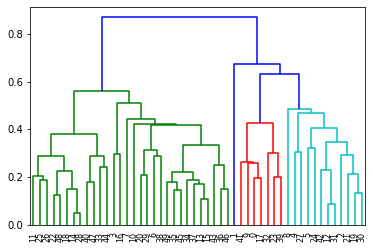

In [13]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

# **Hierarchical Clustering**

In [14]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [16]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [17]:
df_norm['h_clusterid'] = Clusters

In [18]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
49,0.361446,0.397260,0.474576,0.214470,0
28,0.078313,0.041096,0.406780,0.056848,0
34,0.391566,0.256849,0.728814,0.364341,0
26,0.210843,0.195205,0.508475,0.237726,0
25,0.313253,0.219178,0.355932,0.235142,0
48,0.108434,0.027397,0.576271,0.090439,0
35,0.349398,0.363014,0.610169,0.328165,0
22,0.114458,0.092466,0.576271,0.196382,0
36,0.246988,0.390411,0.593220,0.568475,0
20,0.216867,0.356164,0.898305,0.232558,0


In [19]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
49,0.361446,0.397260,0.474576,0.214470,0
28,0.078313,0.041096,0.406780,0.056848,0
34,0.391566,0.256849,0.728814,0.364341,0
26,0.210843,0.195205,0.508475,0.237726,0
25,0.313253,0.219178,0.355932,0.235142,0
48,0.108434,0.027397,0.576271,0.090439,0
35,0.349398,0.363014,0.610169,0.328165,0
22,0.114458,0.092466,0.576271,0.196382,0
36,0.246988,0.390411,0.593220,0.568475,0
20,0.216867,0.356164,0.898305,0.232558,0


# **K_Means Clustering**

In [21]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform(crime.iloc[:,1:])

In [22]:
scaled_crime_df

array([[ 0.79078716, -0.52619514, -0.00345116],
       [ 1.11805959, -1.22406668,  2.50942392],
       [ 1.49381682,  1.00912225,  1.05346626],
       [ 0.23321191, -1.08449238, -0.18679398],
       [ 1.2756352 ,  1.77678094,  2.08881393],
       [ 0.40290872,  0.86954794,  1.88390137],
       [-0.73648418,  0.79976079, -1.09272319],
       [ 0.81502956,  0.45082502, -0.58583422],
       [ 1.99078607,  1.00912225,  1.1505301 ],
       [ 0.48775713, -0.38662083,  0.49265293],
       [-1.51224105,  1.21848371, -0.11129987],
       [-0.61527217, -0.80534376, -0.75839217],
       [ 0.94836277,  1.21848371,  0.29852525],
       [-0.70012057, -0.03768506, -0.0250209 ],
       [-1.39102904, -0.5959823 , -1.07115345],
       [-0.67587817,  0.03210209, -0.34856705],
       [-0.74860538, -0.94491807, -0.53190987],
       [ 0.94836277,  0.03210209,  0.10439756],
       [-1.06375661, -1.01470522, -1.44862395],
       [ 1.56654403,  0.10188925,  0.70835037],
       [-0.26375734,  1.35805802, -0.531

In [23]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [25]:
from sklearn.cluster import KMeans

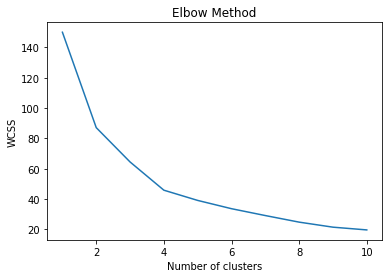

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=2)
    kmeans.fit(scaled_crime_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_crime_df)

KMeans(n_clusters=4, random_state=42)

In [29]:
clusters_new.labels_

array([0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 3, 2, 1, 3, 1, 3, 0, 3, 2, 1, 2,
       1, 0, 1, 3, 1, 2, 3, 1, 2, 2, 0, 3, 1, 1, 1, 1, 1, 0, 3, 0, 1, 1,
       3, 1, 1, 3, 3, 1], dtype=int32)

In [30]:
# Assign clusters to the data set
crime2=crime.copy()
crime2['clustersid_new']=clusters_new.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clustersid_new
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [31]:
# Group data by Clusters (K=4)
crime2.groupby('clustersid_new').agg(['mean']).reset_index()

,clustersid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.960000,138.750000,73.000000,19.280000
2,2,10.809091,269.727273,76.181818,34.345455
3,3,3.618182,77.000000,49.909091,11.536364


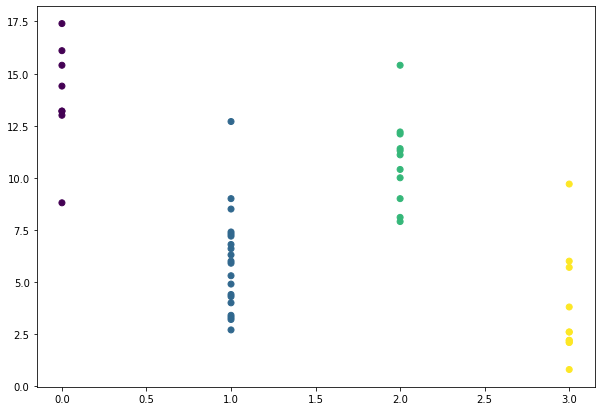

In [33]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['clustersid_new'],crime2['Murder'], c=clusters_new.labels_) 

In [34]:
crime2[crime2['clustersid_new']==3]

,Murder,Assault,UrbanPop,Rape,clustersid_new
11,2.6,120,54,14.2,3
14,2.2,56,57,11.3,3
16,9.7,109,52,16.3,3
18,2.1,83,51,7.8,3
25,6.0,109,53,16.4,3
28,2.1,57,56,9.5,3
33,0.8,45,44,7.3,3
40,3.8,86,45,12.8,3
44,2.2,48,32,11.2,3
47,5.7,81,39,9.3,3


In [35]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new1 = KMeans(3, random_state=30)
clusters_new1.fit(scaled_crime_df)

KMeans(n_clusters=3, random_state=30)

In [36]:
clusters_new1.labels_

array([1, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1,
       2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [40]:
# Assign clusters to the data set
crime3=crime2.copy()
crime3['clustersid_new1']=clusters_new1.labels_
crime3

,Murder,Assault,UrbanPop,Rape,clustersid_new,clustersid_new1
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,2,1
2,8.1,294,80,31.0,2,1
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,2,1
5,7.9,204,78,38.7,2,1
6,3.3,110,77,11.1,1,2
7,5.9,238,72,15.8,1,2
8,15.4,335,80,31.9,2,1
9,17.4,211,60,25.8,0,1


In [41]:
# Group data by Clusters (K=3)
crime3.groupby('clustersid_new1').agg(['mean']).reset_index()

,clustersid_new1,Murder,Assault,UrbanPop,Rape,clustersid_new
,,mean,mean,mean,mean,mean
0,0,4.976923,99.692308,49.461538,12.576923,2.538462
1,1,11.605000,250.250000,69.550000,29.775000,1.250000
2,2,5.447059,131.588235,73.117647,17.800000,1.000000


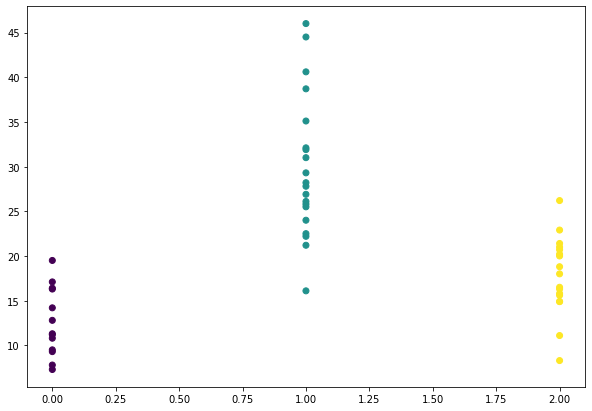

In [42]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime3['clustersid_new1'],crime3['Rape'], c=clusters_new1.labels_) 

# **DBSCAN Clustering**

In [43]:
from sklearn.cluster import DBSCAN

In [55]:
# DBSCAN clustering
dbscan = DBSCAN(eps=1, min_samples=4)    #eps = Epsilon(neighberhood),   Min_smaples = min points
dbscan.fit(scaled_crime_df)

DBSCAN(eps=1, min_samples=4)

In [56]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [57]:
# Adding clusters to dataset
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [58]:
crime.groupby('clusters').agg(['mean']).reset_index()

,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.400000,263.666667,73.333333,43.700000
1,0,7.621277,164.829787,65.042553,19.797872


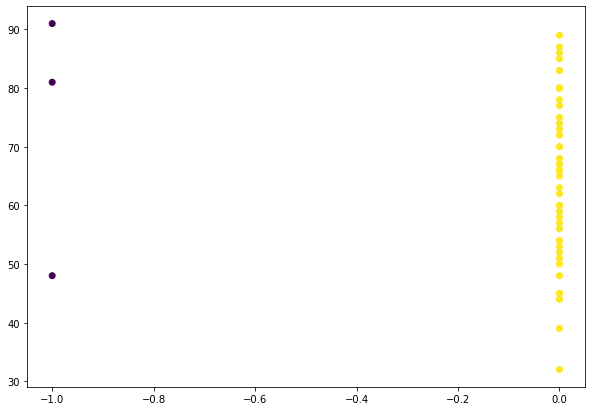

In [59]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_)